# Load data

In [1]:
from kubetools import get_all, delete, top, get_gcloud_node_info
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re 
sns.set(font_scale=1.5, style='white')
%matplotlib inline

In [26]:
df.query('kind=="jupyter" and cpu==0')

,name,cpu,memory,ready,status,restarts,age,ip,node,fullnode,kind,common_pods
276,jupyter-annefou-2dmetos-5fpython-2drdqv5tp2,0.0,0.199,1/1,Running,0,4.000000,10.12.14.137,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter,jupyter-annefou-2dmetos
123,jupyter-sofroniewn-2dtactile-2dcoding-2dxaem0uvq,0.0,0.077,1/1,Running,0,2.000000,10.12.14.77,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter,jupyter-sofroniewn-2dtactile
333,jupyter-ipython-2dipython-2din-2ddepth-2djyeq4tr4,0.0,0.050,1/1,Running,8,2.000000,10.12.14.71,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter,jupyter-ipython-2dipython
352,jupyter-ipython-2dipython-2din-2ddepth-2dwinvhwpl,0.0,0.087,1/1,Running,0,2.000000,10.12.16.75,91w4,gke-prod-a-hm16-e1abb2e9-91w4,jupyter,jupyter-ipython-2dipython
33,jupyter-jupyterlab-2djupyterlab-2ddemo-2dpjdhx1o3,0.0,0.076,1/1,Running,0,1.000000,10.12.6.209,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter,jupyter-jupyterlab-2djupyterlab
59,jupyter-jupyterlab-2djupyterlab-2ddemo-2dxjdvngkw,0.0,0.047,1/1,Running,4,1.000000,10.12.3.122,0nc4,gke-prod-a-hm16-e1abb2e9-0nc4,jupyter,jupyter-jupyterlab-2djupyterlab
86,jupyter-jupyterlab-2djupyterlab-2ddemo-2d33sr4kcj,0.0,0.046,1/1,Running,1,1.000000,10.12.14.139,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter,jupyter-jupyterlab-2djupyterlab
89,jupyter-jupyterlab-2djupyterlab-2ddemo-2d27xydk5y,0.0,0.047,1/1,Running,2,1.000000,10.12.14.102,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter,jupyter-jupyterlab-2djupyterlab
101,jupyter-jupyterlab-2djupyterlab-2ddemo-2dihh46sjw,0.0,0.047,1/1,Running,1,1.000000,10.12.3.128,0nc4,gke-prod-a-hm16-e1abb2e9-0nc4,jupyter,jupyter-jupyterlab-2djupyterlab
158,jupyter-twosigma-2dbeakerx-2dyx5u7olv,0.0,0.074,1/1,Running,1,1.000000,10.12.17.214,nlrb,gke-prod-a-hm16-e1abb2e9-nlrb,jupyter,jupyter-twosigma-2dbeakerx


In [2]:
# Grab all pods + pod resources information, merge into one df
df_top = top('pod')
df_get = get_all('pod')
df = pd.merge(df_top, df_get, on='name', how='outer')

# Convert age to hours and sort
df['age'] /= 60.0
df = df.sort_values(['age', 'cpu'], ascending=False)

# Determine if this is a user/prod/etc pod
df['kind'] = df['name'].map(lambda a: a.split('-')[0])

df['restarts'] = pd.to_numeric(df['restarts'])

# Grab node information from both kubectl and gcloud
nodes = get_all('node')
nodes_gcloud = get_gcloud_node_info().rename(columns={'external_ip': 'external-ip', 'status': 'status_gcloud'})
nodes = pd.merge(nodes, nodes_gcloud, on=['name', 'external-ip'])
nodes = nodes[['name', 'internal_ip', 'external-ip', 'status', 'roles', 'age', 'version', 'os-image',
               'kernel-version', 'container-runtime', 'zone', 'machine_type', 'status_gcloud']]

# Sandbox

In [3]:
df.groupby('node').count()['name']

node
0nc4      100
0sk3       98
91w4       82
<none>      2
k6t6        7
nlrb       96
x8m7       96
Name: name, dtype: int64

# Specific queries

## Pods per node

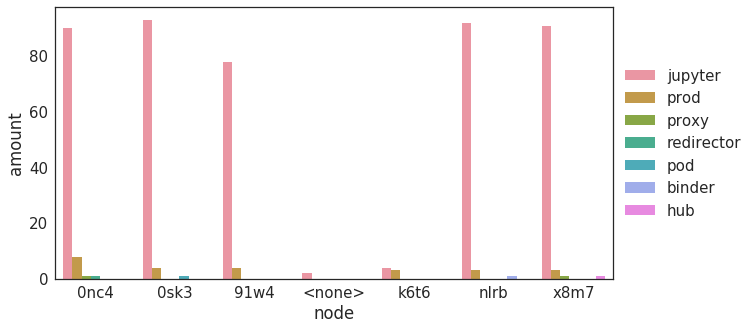

In [4]:
# All pods
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='node', y='amount', hue='kind',
            data=df.groupby(['node', 'kind']).count()['name'].reset_index(name='amount'))
ax.legend(loc=(1.01, .2))

In [5]:
df.groupby(['node', 'fullnode', 'kind']).count()['name']

node    fullnode                       kind      
0nc4    gke-prod-a-hm16-e1abb2e9-0nc4  jupyter       90
                                       prod           8
                                       proxy          1
                                       redirector     1
0sk3    gke-prod-a-hm16-e1abb2e9-0sk3  jupyter       93
                                       pod            1
                                       prod           4
91w4    gke-prod-a-hm16-e1abb2e9-91w4  jupyter       78
                                       prod           4
<none>  <none>                         jupyter        2
k6t6    gke-prod-a-hm16-e1abb2e9-k6t6  jupyter        4
                                       prod           3
nlrb    gke-prod-a-hm16-e1abb2e9-nlrb  binder         1
                                       jupyter       92
                                       prod           3
x8m7    gke-prod-a-hm16-e1abb2e9-x8m7  hub            1
                                       jupyter       9

## Pod statuses

In [6]:
df.groupby(['status', 'node']).count()['name']

status             node  
ContainerCreating  k6t6        1
Init:0/1           k6t6        1
Init:0/2           k6t6        4
Pending            <none>      2
Running            0nc4      100
                   0sk3       98
                   91w4       82
                   k6t6        1
                   nlrb       96
                   x8m7       96
Name: name, dtype: int64

# Pods by node

## Production pods by node

In [7]:
names = ['hub-', 'binder-', 'pod-culler-', 'redirector-', 'prod-']
df.loc[[not ii.startswith('jupyter-') for ii in df['name'].values]].sort_values(['node', 'name']).set_index(['node', 'kind'])

name     cpu  \
node kind                                                                    
0nc4 prod                                          prod-dind-rpd5r     4.0   
     prod                            prod-grafana-7df85c47b4-j7lpw     2.0   
     prod                                 prod-image-cleaner-8xjfc     0.0   
     prod                          prod-kube-lego-7c8df7d844-8q5l4     0.0   
     prod            prod-nginx-ingress-controller-7b47458d9-cdsnj    13.0   
     prod        prod-nginx-ingress-default-backend-66b8f956d6-...     0.0   
     prod        prod-prometheus-kube-state-metrics-7596599c6f-...     9.0   
     prod                      prod-prometheus-node-exporter-g9bt6     0.0   
     proxy                          proxy-patches-6548cd8f44-8p58n     1.0   
     redirector                        redirector-5bbc789f4c-lw66s     0.0   
0sk3 pod                               pod-culler-65fb55fc7c-cq7nm    12.0   
     prod                                          prod-dind-sl4ks     3.0   
     prod                                 prod-image-cleaner-db9ql     0.0   
     prod            prod-nginx-ingress-controller-7b47458d9-l2lqq    14.0   
     prod                      prod-prometheus-node-exporter-snb64     0.0   
91w4 prod                                          prod-dind-5xpv5     3.0   
     prod                                 prod-image-cleaner-4k754     0.0   
     prod                      prod-prometheus-node-exporter-kqd5b     0.0   
     prod                  prod-prometheus-server-8659cf6569-tsz6w  3949.0   
k6t6 prod                                          prod-dind-zv4pv     NaN   
     prod                                 prod-image-cleaner-pb9g9     NaN   
     prod                      prod-prometheus-node-exporter-8wpls     NaN   
nlrb binder                                 binder-d799f5855-mb4jn   229.0   
     prod                                          prod-dind-vd5sc     2.0   
     prod                                 prod-image-cleaner-cg9v4     0.0   
     prod                      prod-prometheus-node-exporter-tnzrl     1.0   
x8m7 hub                                      hub-564ffb547f-jshwl   157.0   
     prod                                          prod-dind-s8jsf     2.0   
     prod                                 prod-image-cleaner-rpj6v     0.0   
     prod                      prod-prometheus-node-exporter-8jnr9     0.0   
     proxy                                  proxy-8495bd6d45-m7q88    19.0   

                 memory ready             status  restarts         age  \
node kind                                                                
0nc4 prod        13.270   1/1            Running         0  312.000000   
     prod         0.053   1/1            Running         0   72.000000   
     prod         0.063   2/2            Running         0  312.000000   
     prod         0.015   1/1            Running         1   72.000000   
     prod         0.231   1/1            Running         0   72.000000   
     prod         0.004   1/1            Running         0  240.000000   
     prod         0.059   1/1            Running         0   96.000000   
     prod         0.014   1/1            Running         0  312.000000   
     proxy        0.019   2/2            Running         0   24.000000   
     redirector   0.003   1/1            Running         0  168.000000   
0sk3 pod          0.071   1/1            Running         1   24.000000   
     prod         8.265   1/1            Running         0   48.000000   
     prod         0.064   2/2            Running         0   48.000000   
     prod         0.229   1/1            Running         0   24.000000   
     prod         0.014   1/1            Running         0   48.000000   
91w4 prod         2.335   1/1            Running         0   24.000000   
     prod         0.063   2/2            Running         0   24.000000   
     prod         0.013   1/1            Running         0   24.000000   
     pr

## User pods by node

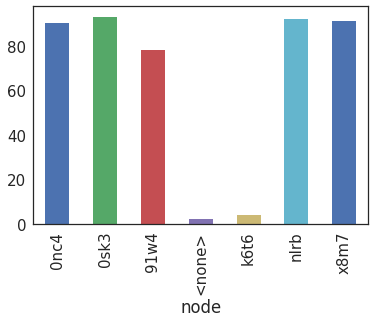

In [8]:
df.loc[[ii.startswith('jupyter-') for ii in df['name'].values]].sort_values(['node', 'name']).groupby('node').count()['name'].plot.bar()

## Pod restarts

In [9]:
df.sort_values('restarts', ascending=False).head(10)

,name,cpu,memory,ready,status,restarts,age,ip,node,fullnode,kind
333,jupyter-ipython-2dipython-2din-2ddepth-2djyeq4tr4,0.0,0.050,1/1,Running,8,2.000000,10.12.14.71,0sk3,gke-prod-a-hm16-e1abb2e9-0sk3,jupyter
267,jupyter-costrouc-2dknoxvi-2dndata-2dnotebooks-...,0.0,0.046,1/1,Running,5,0.900000,10.12.6.237,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
133,jupyter-rlabbe-2dkalman-2da-2dlters-2din-2dpyt...,0.0,0.047,1/1,Running,5,0.900000,10.12.6.238,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
377,jupyter-ipython-2dipython-2din-2ddepth-2d0ofuelrl,0.0,0.050,1/1,Running,5,0.883333,10.12.6.239,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
408,jupyter-ipython-2dipython-2din-2ddepth-2d7od563n8,0.0,0.050,1/1,Running,5,0.883333,10.12.6.240,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
409,jupyter-ipython-2dipython-2din-2ddepth-2d6j6fq0rr,0.0,0.050,1/1,Running,5,0.883333,10.12.6.243,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
247,jupyter-ines-2dspacy-2dio-2dbinder-2delu3u0bp,0.0,0.041,1/1,Running,5,0.866667,10.12.6.246,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
343,jupyter-ipython-2dipython-2din-2ddepth-2dnyj5sljo,0.0,0.050,1/1,Running,5,0.866667,10.12.6.247,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
370,jupyter-ines-2dspacy-2dio-2dbinder-2dmc4n3svq,0.0,0.041,1/1,Running,5,0.866667,10.12.6.245,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter
447,jupyter-ipython-2dipython-2din-2ddepth-2dhmafq6c1,NaN,NaN,1/1,Running,5,0.850000,10.12.6.248,x8m7,gke-prod-a-hm16-e1abb2e9-x8m7,jupyter


## Pod Resources

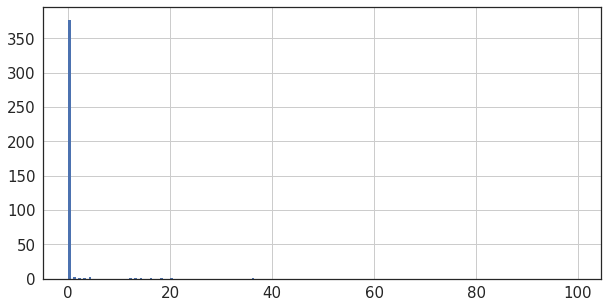

In [10]:
df.query('kind=="jupyter"')['cpu'].hist(figsize=(10, 5), bins=np.arange(0, 100, .5))

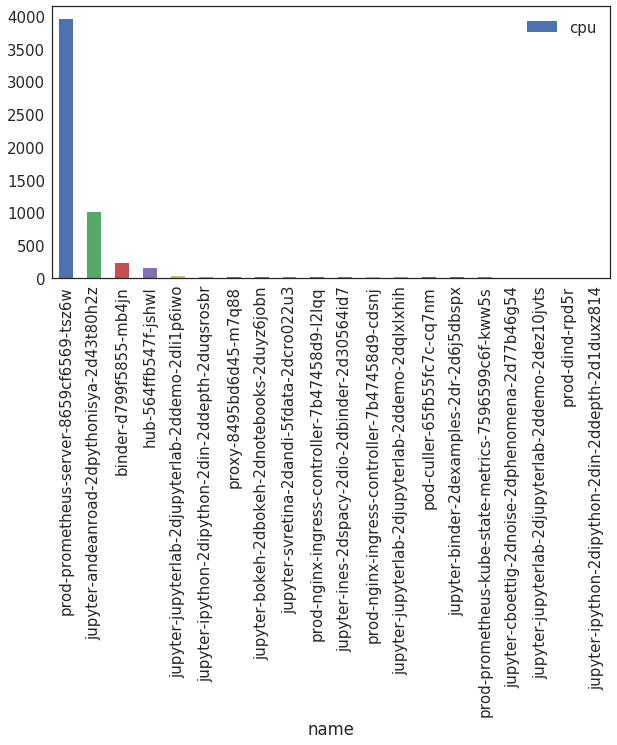

In [11]:
# CPU usage
df.sort_values('cpu', ascending=False).head(20).plot.bar(x='name', y='cpu', figsize=(10, 5))

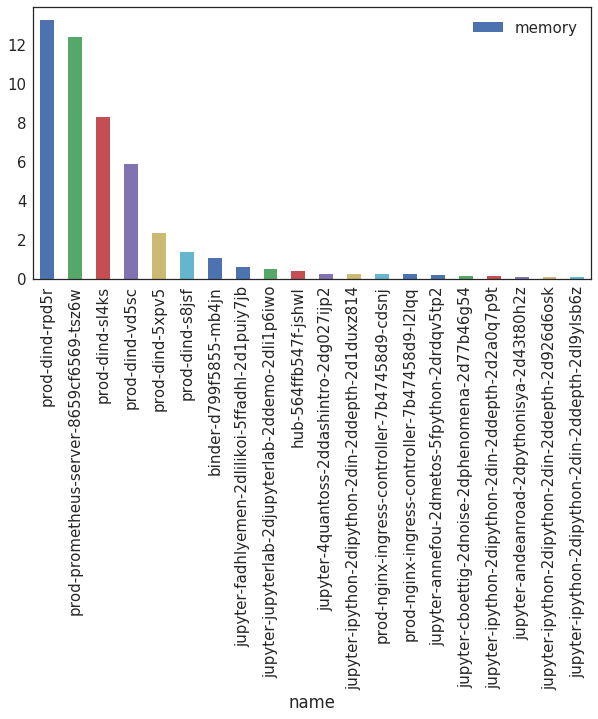

In [12]:
df.sort_values('memory', ascending=False).head(20).plot.bar(x='name', y='memory', figsize=(10, 5))

## Per repo pods

In [13]:
df['common_pods'] = df['name'].map(lambda a: '-'.join(a.split('-')[:3]))

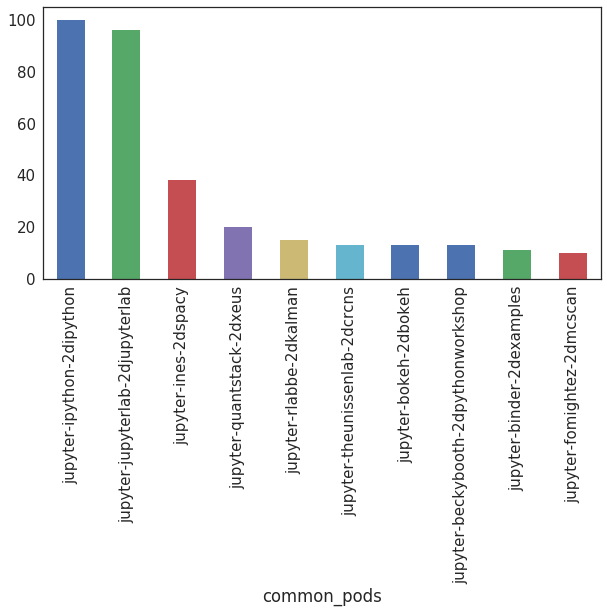

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('common_pods').count()['name'].sort_values(ascending=False).head(10).plot.bar()

## Distribution of pod age

/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/choldgraf/anaconda/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

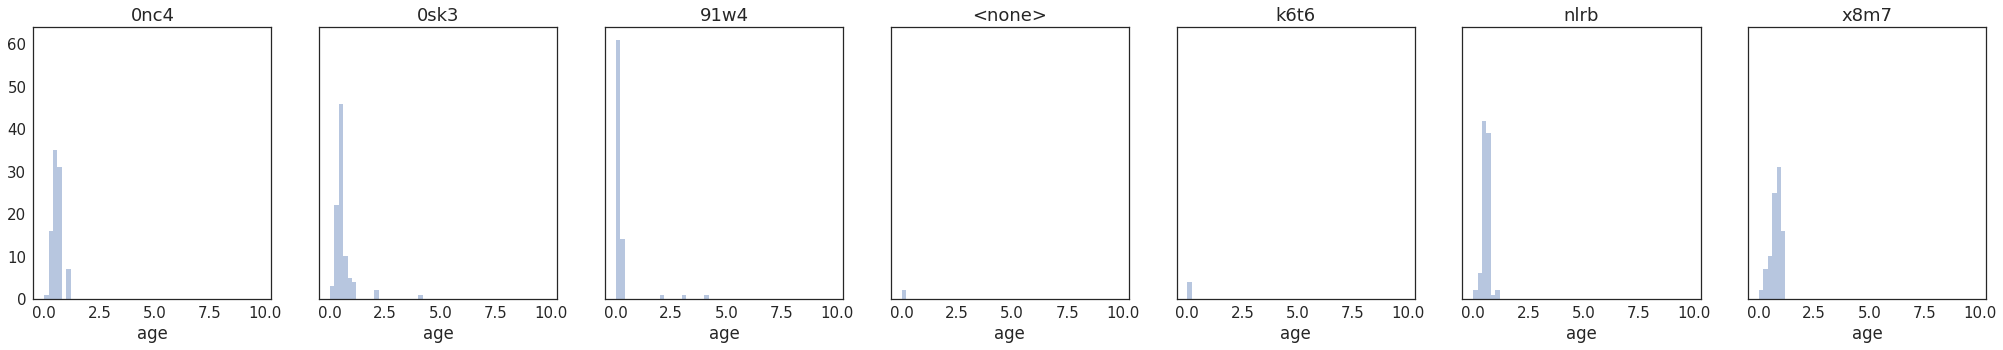

In [15]:
n_nodes = len(df.groupby('node'))
fig, axs = plt.subplots(1, n_nodes, figsize=(5*n_nodes, 5), sharex=True, sharey=True)

for ax, (node, vals) in zip(axs.ravel(), df.groupby('node')):
    sns.distplot(vals.query('kind=="jupyter"')['age'], bins=np.arange(0, 10, .2),
                 kde=False, ax=ax, label=node)
    ax.set(title=node)


## Nodes

In [16]:
nodes.sort_values('internal_ip')

,name,internal_ip,external-ip,status,roles,age,version,os-image,kernel-version,container-runtime,zone,machine_type,status_gcloud
2,gke-prod-a-hm16-e1abb2e9-91w4,10.128.0.2,35.224.37.210,Ready,<none>,1440.000000,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING
0,gke-prod-a-hm16-e1abb2e9-0nc4,10.128.0.3,35.184.140.95,Ready,<none>,18720.000000,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING
4,gke-prod-a-hm16-e1abb2e9-nlrb,10.128.0.4,35.193.18.41,Ready,<none>,360.000000,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING
3,gke-prod-a-hm16-e1abb2e9-k6t6,10.128.0.5,35.239.147.158,Ready,<none>,0.583333,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING
5,gke-prod-a-hm16-e1abb2e9-x8m7,10.128.0.6,35.238.218.76,Ready,<none>,5760.000000,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING
1,gke-prod-a-hm16-e1abb2e9-0sk3,10.128.0.8,35.239.113.40,Ready,<none>,2880.000000,v1.10.2-gke.1,Container-Optimized OS from Google,4.14.22+,docker://17.3.2,us-central1-a,n1-highmem-16,RUNNING


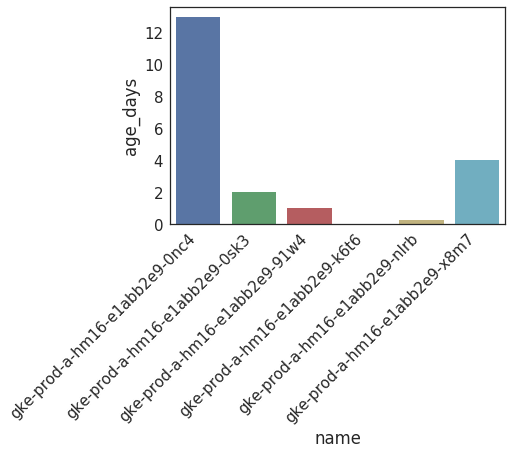

In [17]:
nodes['age_days'] = nodes['age'] / 60 / 24
ax = sns.barplot(x='name', y='age_days', data=nodes)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');